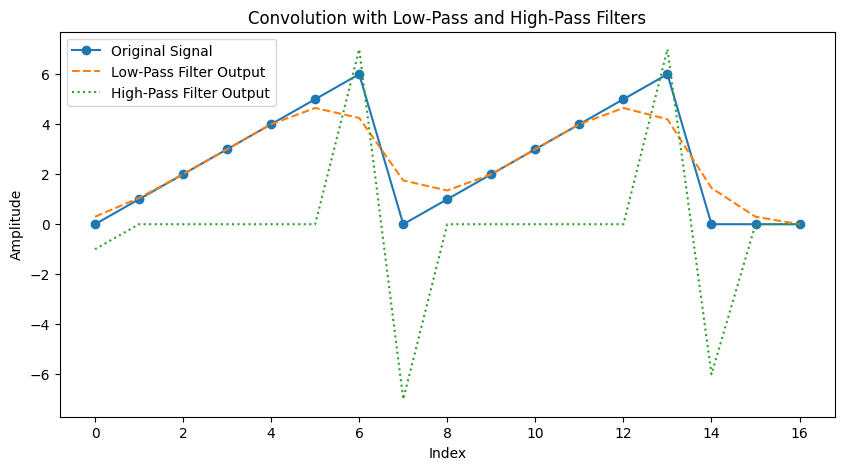

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signal
X = np.array([0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,0,0])

# Define Low-Pass and High-Pass filters
H_L = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
H_H = np.array([-1, 2, -1])

# Perform convolution
y_low = np.convolve(X, H_L, mode='same')  # Low-pass filter
y_high = np.convolve(X, H_H, mode='same') # High-pass filter

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(X, label='Original Signal', marker='o')
plt.plot(y_low, label='Low-Pass Filter Output', linestyle='dashed')
plt.plot(y_high, label='High-Pass Filter Output', linestyle='dotted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.title('Convolution with Low-Pass and High-Pass Filters')
plt.show()


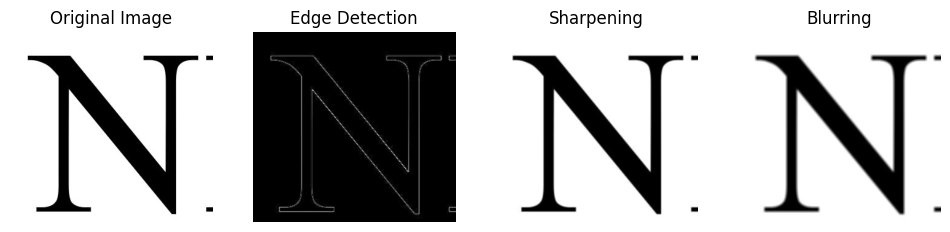

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

# Load and preprocess image
im = imread("Neural.JPG")  # Update path if needed
img = rgb2gray(im) * 255  # Convert to grayscale and scale
img1 = img[40:350, 20:350]  # Crop region of interest

# Define Filters
fil1 = np.array([[ 0, -1, 0],
                 [-1, 4, -1],
                 [ 0, -1, 0]])  # Edge Detection (Laplacian)

fil2 = np.array([[ 0.2, 0.5, 0.2],
                 [0.5, 1, 0.5],
                 [0.2, 0.5, 0.2]])  # Sharpening

fil3 = np.ones((5, 5)) / 25  # Blurring (Averaging filter)

# Apply Convolution
grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')  # Edge detection
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')  # Sharpening
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')  # Blurring

# Display Original Image
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display Filtered Images
plt.subplot(1, 4, 2)
plt.imshow(abs(grad1), cmap='gray')
plt.title("Edge Detection")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(grad2, cmap='gray')
plt.title("Sharpening")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(grad3, cmap='gray')
plt.title("Blurring")
plt.axis('off')

plt.show()


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training set further for validation (80% train, 20% validation)
x_train, x_val = x_train[:48000], x_train[48000:]
y_train, y_val = y_train[:48000], y_train[48000:]

# Build a Fully Connected Neural Network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert 28x28 images to a 1D array of 784
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output neurons for 10 classes (0-9)
])

# Compile model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the network
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=128)


Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3790 - accuracy: 0.8964 - val_loss: 0.1744 - val_accuracy: 0.9498
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1505 - accuracy: 0.9566 - val_loss: 0.1401 - val_accuracy: 0.9607
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1034 - accuracy: 0.9695 - val_loss: 0.1253 - val_accuracy: 0.9643
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0788 - accuracy: 0.9762 - val_loss: 0.1109 - val_accuracy: 0.9670
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0627 - accuracy: 0.9811 - val_loss: 0.0888 - val_accuracy: 0.9728
Epoch 6/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.0908 - val_accuracy: 0.9748
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0403 - accuracy: 0.9878 - val_loss: 0.0922 - val_accuracy: 0.9743
Epoch 

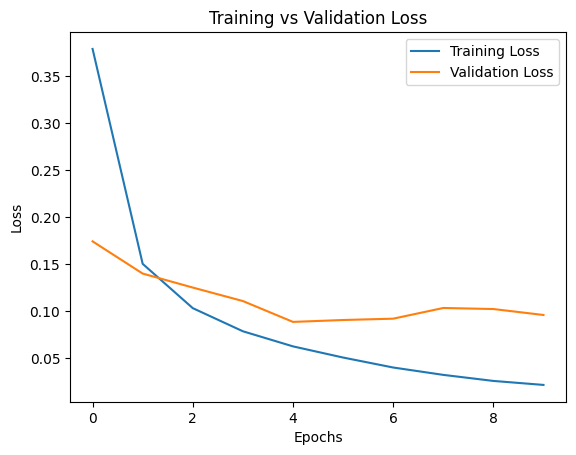

In [4]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


Test Accuracy: 0.9777
Test Loss: 0.0788
313/313 [==============================] - 1s 1ms/step


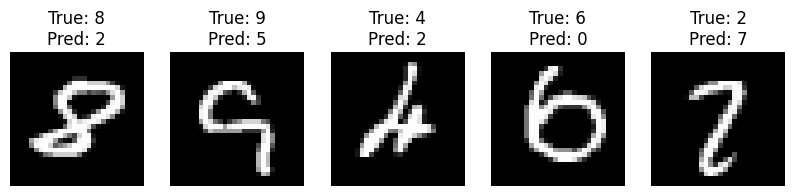

In [5]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict classes for test images
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Identify misclassified images
misclassified_indices = np.where(y_pred != y_true)[0]

# Plot some misclassified images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')

plt.show()
